In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('C:/Users/lclai/Desktop/LDIG/DB/training/feat_coloumb_energy.csv')

In [23]:
print(df.shape)

(15667, 1298)


In [24]:
df.isnull().sum().sum()

0

In [25]:
df.head(5)

,pubchem_id,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
0,25004,228.41,C15H32O,20.2,151.0,5.7,16,1,1,8,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,-19.013763
1,25005,179.17,C6H13NO5,79.2,125.0,-1.2,12,2,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.161019
2,25006,116.20,C7H16O,20.2,52.3,2.2,8,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.376619
3,25009,190.28,C10H22O3,38.7,96.2,1.5,13,1,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.776438
4,25011,118.17,C6H14O2,18.5,45.8,0.7,8,0,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.537140


In [26]:
df.Eat.describe()

count    15667.000000
mean       -11.189138
std          3.660478
min        -23.245373
25%        -13.479175
50%        -10.835219
75%         -8.628143
max         -0.789513
Name: Eat, dtype: float64

C:\Users\lclai\AppData\Local\Temp\ipykernel_6896\734172462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Eat'], kde=True, color="g")


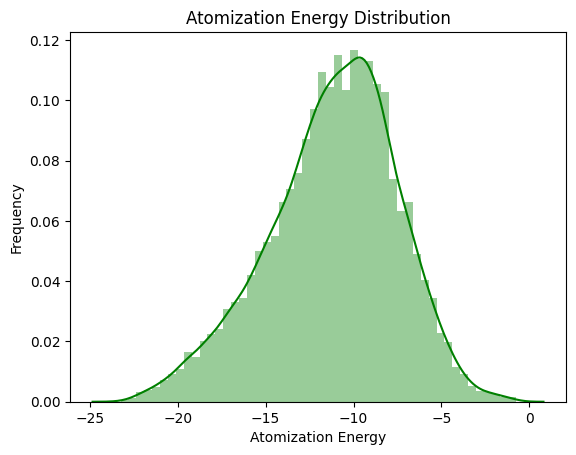

In [27]:
sns.distplot(df['Eat'], kde=True, color="g")
plt.xlabel('Atomization Energy')
plt.ylabel('Frequency')
plt.title('Atomization Energy Distribution');

In [28]:
df.head()

,pubchem_id,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
0,25004,228.41,C15H32O,20.2,151.0,5.7,16,1,1,8,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,-19.013763
1,25005,179.17,C6H13NO5,79.2,125.0,-1.2,12,2,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.161019
2,25006,116.20,C7H16O,20.2,52.3,2.2,8,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.376619
3,25009,190.28,C10H22O3,38.7,96.2,1.5,13,1,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.776438
4,25011,118.17,C6H14O2,18.5,45.8,0.7,8,0,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.537140


In [29]:
#FEATURE EXTRACTION

from sklearn.decomposition import PCA
df = df.drop(['mf','pubchem_id'], axis = 1)
pca = PCA(n_components=2)
z = pca.fit_transform(df)
z = pd.DataFrame(z)

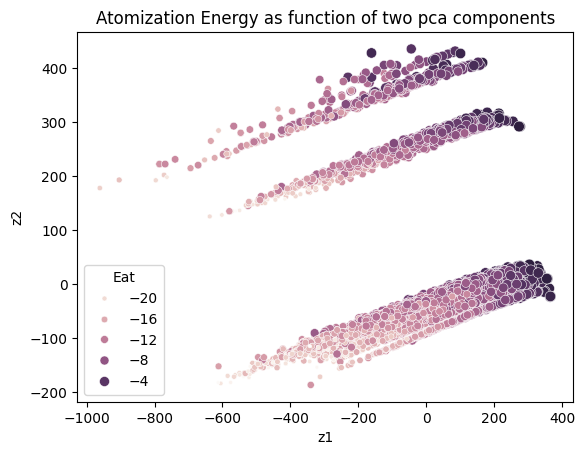

In [30]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax = sns.scatterplot(x=-z[0], y=z[1],
                     size=df.Eat,hue=df.Eat,
                     palette=cmap, sizes=(5, 60))
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Atomization Energy as function of two pca components');

In [31]:
y = df['Eat']
X1 = df.drop(['Eat'], axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X1)
X = pd.DataFrame(X, columns=X1.columns)

In [32]:
type(y)

pandas.core.series.Series

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

lgbm_model = LGBMRegressor(num_leaves = 25, n_estimators = 250, min_child_weight = 5, max_depth = 4, learning_rate = 0.08,
                           colsample_bytree = 0.3)

xgb_model = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 0.0625, reg_lambda = 0,
                         max_depth = 6, colsample_bytree = 0.2, min_child_weight = 10, n_estimators = 400)
rf_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 3, max_features = 'sqrt', max_depth = 8)
#knn_model = KNeighborsRegressor(weights = 'distance', n_neighbors = 3, leaf_size = 90)
#ridge_model = Ridge(alpha = 1000)
lasso_model = Lasso(alpha = 0.01, max_iter=10000)
#enet_model = ElasticNet(alpha = 0.01, l1_ratio = 0.1, max_iter=10000)

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
class AveragingRegressor(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, regressors):
        self.regressors = regressors
        self.predictions = None

    def fit(self, X, y):
        for regr in self.regressors:
            regr.fit(X, y)
        return self

    def predict(self, X):
        self.predictions = np.column_stack([regr.predict(X) for regr in self.regressors])
        return np.mean(self.predictions, axis=1) 
averaged_model = AveragingRegressor([xgb_model, lgbm_model])

In [36]:
from mlxtend.regressor import StackingCVRegressor

stacked_model = StackingCVRegressor(
    regressors=[xgb_model, lgbm_model],
    meta_regressor=Ridge()
)

c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:58:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:58:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:58:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now depre

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 225911
[LightGBM] [Info] Number of data points in the train set: 8772, number of used features: 1241
[LightGBM] [Info] Start training from score -11.182198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:00:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 225911
[LightGBM] [Info] Number of data points in the train set: 8772, number of used features: 1241
[LightGBM] [Info] Start training from score -11.182198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:00:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226726
[LightGBM] [Info] Number of data points in the train set: 8773, number of used features: 1291
[LightGBM] [Info] Start training from score -11.203424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:00:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.122104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 225765
[LightGBM] [Info] Number of data points in the train set: 8773, number of used features: 1291
[LightGBM] [Info] Start training from score -11.211704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:01:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.150278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226745
[LightGBM] [Info] Number of data points in the train set: 8773, number of used features: 1291
[LightGBM] [Info] Start training from score -11.197444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.116148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226020
[LightGBM] [Info] Number of data points in the train set: 8773, number of used features: 1241
[LightGBM] [Info] Start training from score -11.200116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

<Axes: xlabel='Model'>

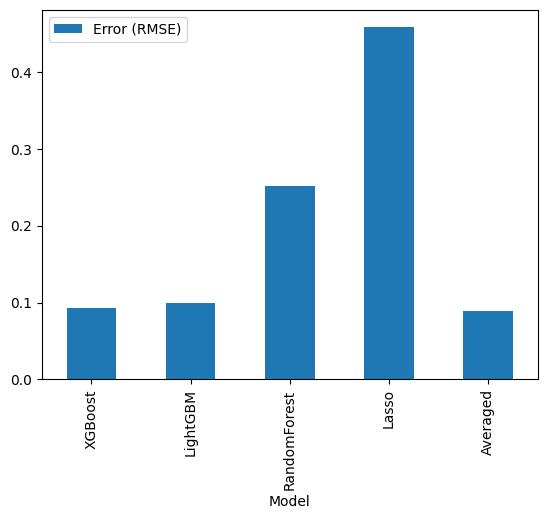

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
def rmse_fun(predicted, actual):
    return np.sqrt(np.mean(np.square(predicted - actual)))
rmse = make_scorer(rmse_fun, greater_is_better=False)
models = [
     ('XGBoost', xgb_model),
     ('LightGBM', lgbm_model),
     ('RandomForest', rf_model),
     #('Ridge', ridge_model),
     ('Lasso', lasso_model),
     #('ElasticNet', enet_model),
     #('KNN', knn_model),
     ('Averaged', averaged_model),
     #('Stacked', stacked_model),
]
scores = [
    -1.0 * cross_val_score(model, x_train.values, y_train.values, scoring=rmse, cv=5).mean()
    for _,model in models
]
dataz = pd.DataFrame({ 'Model': [name for name, _ in models], 'Error (RMSE)': scores })
dataz.plot(x='Model', kind='bar')

In [38]:
dataz

,Model,Error (RMSE)
0,XGBoost,0.092536
1,LightGBM,0.099152
2,RandomForest,0.251536
3,Lasso,0.458326
4,Averaged,0.088605
